In [145]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [146]:
# Define functions 

def load_data(path):
    '''
    carregar dados
    '''
    
    df = pd.read_csv(path, sep = ';')
    print('Data loaded successfully')
    
    return df

def visualize_df_data(df):   
    '''
    visualizar tipo de dados
    '''

    print("preview dos dados")
    print(df.head(5))
    print("tipo dos dados")
    print(df.info())

def get_processed_df(df, columns_to_drop):
    '''
    remover colunas não utilizadas na analise
    '''
    
    df_processed = df.drop(columns_to_drop, axis=1) #drop colunas desnecessarias
    
    return df_processed

def get_df_stats(df):
    '''
    monstrar caracteristicas dos dados
    '''

    print("colunas utilizadas")
    print(df.info())

    print("caracteristica das variaveis")
    df.select_dtypes('number').describe().transpose() #caracteristica das variaveis numericas

    print("visulizar colunas com valores faltantes")
    print(df.isna().sum()) #Income com valores faltantes
    
def get_hist_plot(df, colunm_name):
    '''
    plotar histograma
    '''
    sns.set(font_scale=0.6)
    for i in range(len(colunm_name)):
        plt.subplot(int(np.ceil(len(colunm_name)/2)), 2, i+1)
        sns.histplot(x = df[colunm_name[i]])
    plt.show()

def get_encoded_df(df, colunm_name):
    '''
    codificar colunas
    '''
    le = LabelEncoder() 
    for i in range(len(colunm_name)):
        df_encoded[colunm_name[i]] = le.fit_transform(df[colunm_name[i]])
    
    print(df_encoded.head(5))
        
    return df_encoded

def get_scale_df(df):
    '''
    normatização das colunas
    '''
    min_max_scaler = MinMaxScaler()
    df[df.columns] = min_max_scaler.fit_transform(df)
    print(df.head(5))
        
    return df

def aval_elbow(df, kmax):
    '''
    avaliação pelo metodo elbow
    '''
    kmeans = KMeans(random_state=42)
    elb_visualizer = KElbowVisualizer(kmeans, k=(1,kmax))
    elb_visualizer.fit(df)    
    elb_visualizer.show() 

def aval_silhouette(df, kmax):
    '''
    avaliação pelo metodo silhouette
    '''
    silhouette_coefficients = []
    for k in range(2, kmax):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(df)
        score = silhouette_score(df, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.plot(range(2, kmax), silhouette_coefficients)
    plt.xticks(range(2, kmax))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()


In [147]:
path = 'https://github.com/knmukai/retail-customer-segmentation-analysis/blob/main/marketing_campaign.csv?raw=true'
df = load_data(path)

Data loaded successfully


In [148]:
visualize_df_data(df)

preview dos dados
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain 

In [149]:
columns_to_drop = ['ID', 'Dt_Customer', 'Recency', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Z_CostContact', 'NumDealsPurchases','NumWebPurchases', 'Z_Revenue',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_processed = get_processed_df(df, columns_to_drop)

In [150]:
get_df_stats(df_processed)

colunas utilizadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year_Birth        2240 non-null   int64  
 1   Education         2240 non-null   object 
 2   Marital_Status    2240 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2240 non-null   int64  
 5   Teenhome          2240 non-null   int64  
 6   MntWines          2240 non-null   int64  
 7   MntFruits         2240 non-null   int64  
 8   MntMeatProducts   2240 non-null   int64  
 9   MntFishProducts   2240 non-null   int64  
 10  MntSweetProducts  2240 non-null   int64  
 11  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 210.1+ KB
None
caracteristica das variaveis
visulizar colunas com valores faltantes
Year_Birth           0
Education            0
Marital_Status       0
Income   

visualizar caracteristica dos clientes


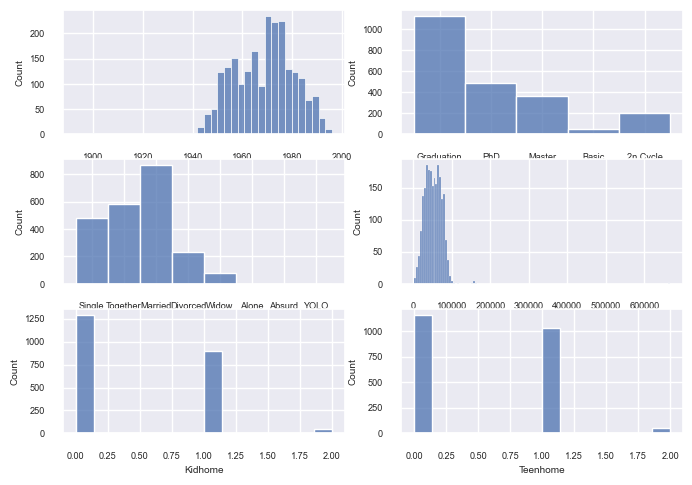

In [151]:
print("visualizar caracteristica dos clientes")
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']

get_hist_plot(df_processed, cols)

In [152]:
print("substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced")
print(df_processed['Marital_Status'].value_counts())
df_processed['Marital_Status'].replace(['Alone','Absurd','YOLO'], 'Single', inplace=True)
df_processed['Marital_Status'].replace(['Widow'], 'Divorced', inplace=True)
print(df_processed['Marital_Status'].value_counts())

substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Married     864
Together    580
Single      487
Divorced    309
Name: Marital_Status, dtype: int64


In [153]:
print('sinalizar apenas se possui ou não filhos')
df_processed['Childhome'] = np.where((df_processed['Kidhome'] == 0) | (df_processed['Teenhome'] == 0), 0, 1)
df_processed = df_processed.drop(['Kidhome', 'Teenhome'], axis=1) #drop colunas de filhos
print(df_processed['Childhome'].value_counts())

sinalizar apenas se possui ou não filhos
0    1813
1     427
Name: Childhome, dtype: int64


In [154]:
print("media da renda por nivel de educacao")
print(df_processed.groupby(['Education'])['Income'].mean())
df_processed['Income'].fillna(df_processed.groupby('Education')['Income'].transform('mean'), inplace = True) #substituir valores na pela media por Education
print("valores faltantes de renda substituidos pela media por nivel de educacao")
print(df_processed.isna().sum()) #Income com valores faltantes

media da renda por nivel de educacao
Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64
valores faltantes de renda substituidos pela media por nivel de educacao
Year_Birth          0
Education           0
Marital_Status      0
Income              0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
Childhome           0
dtype: int64


qtd de registros antes da remocao de outliers:2240
qtd de registros antes da remocao de outliers:2224


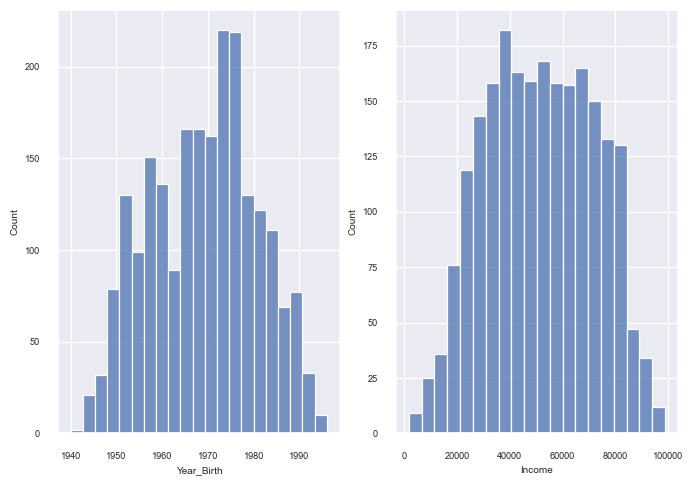

In [155]:
# remoção de outliers
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))
df_processed = df_processed[(df_processed['Year_Birth']>=1940) & (df_processed['Income']<=100000)].reset_index()
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))

cols = ['Year_Birth', 'Income']

get_hist_plot(df_processed, cols)

In [156]:
print("codificacao das colunas categoricas")
df_encoded = df_processed.copy()
cols = ['Education', 'Marital_Status']
df_encoded = get_encoded_df(df_encoded, cols)

codificacao das colunas categoricas
   index  Year_Birth  Education  Marital_Status   Income  MntWines  MntFruits  \
0      0        1957          2               2  58138.0       635         88   
1      1        1954          2               2  46344.0        11          1   
2      2        1965          2               3  71613.0       426         49   
3      3        1984          2               3  26646.0        11          4   
4      4        1981          4               1  58293.0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  Childhome  
0              546              172                88            88          0  
1                6                2                 1             6          1  
2              127              111                21            42          0  
3               20               10                 3             5          0  
4              118               46                27            15     

In [157]:
print("normatização")
df_encoded=get_scale_df(df_encoded)

normatização
      index  Year_Birth  Education  Marital_Status    Income  MntWines  \
0  0.000000    0.303571        0.5        0.666667  0.581244  0.425318   
1  0.000447    0.250000        0.5        0.666667  0.459715  0.007368   
2  0.000893    0.446429        0.5        1.000000  0.720094  0.285332   
3  0.001340    0.785714        0.5        1.000000  0.256742  0.007368   
4  0.001787    0.732143        1.0        0.333333  0.582841  0.115874   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0   0.442211         0.316522         0.664093          0.334601   
1   0.005025         0.003478         0.007722          0.003802   
2   0.246231         0.073623         0.428571          0.079848   
3   0.020101         0.011594         0.038610          0.011407   
4   0.216080         0.068406         0.177606          0.102662   

   MntGoldProds  Childhome  
0      0.243094        0.0  
1      0.016575        1.0  
2      0.116022        0.0  
3      0.013812  

definição do numero de clusters
elbow method


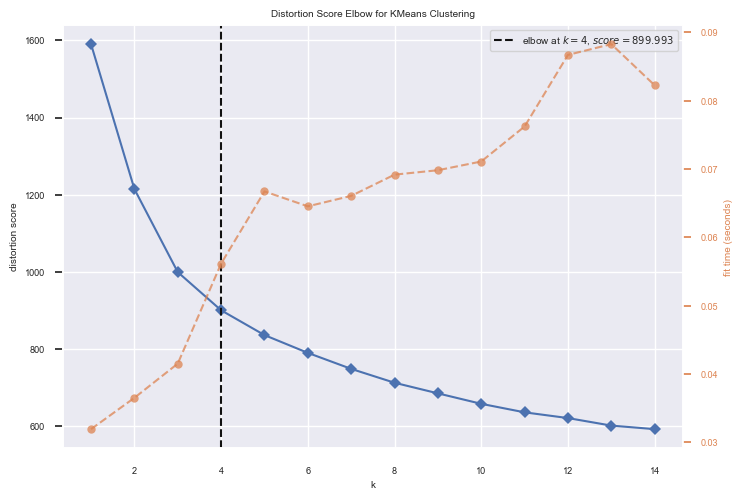

In [158]:
print("definição do numero de clusters")
print("elbow method")
aval_elbow(df_encoded, 15)

definição do numero de clusters
silhouette method


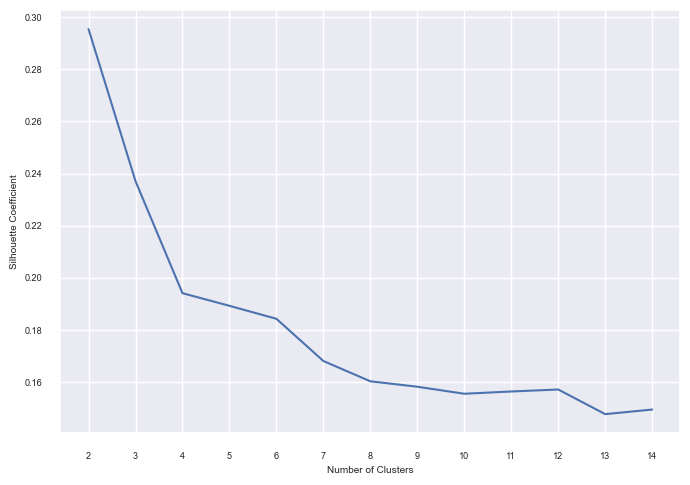

In [159]:
print("definição do numero de clusters")
print("silhouette method")
aval_silhouette(df_encoded, 15)

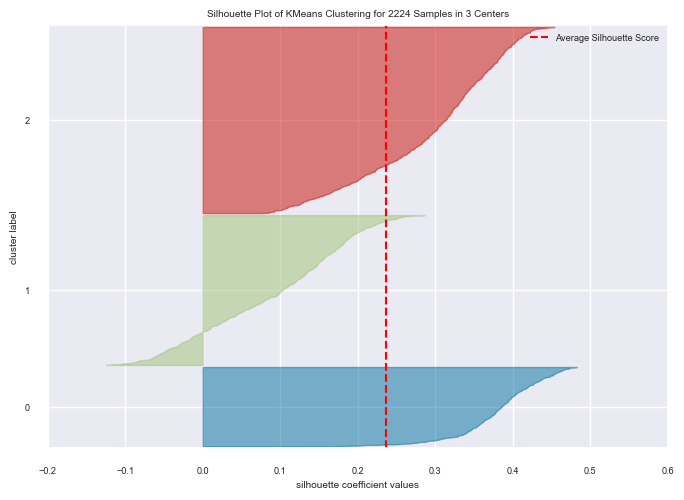

pelo elbow k=4, pelo silhouette k=2. Definido k=3


In [170]:
kmeans = KMeans(n_clusters = 3, random_state=42)
sil_visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
sil_visualizer.fit(df_encoded)    
sil_visualizer.show() 
print("pelo elbow k=4, pelo silhouette k=2. Definido k=3")

In [171]:
print("k-means clustering")
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(df_encoded)
df_processed['cluster']=kmeans.labels_
print(df_processed.head(5))

k-means clustering
   index  Year_Birth   Education Marital_Status   Income  MntWines  MntFruits  \
0      0        1957  Graduation         Single  58138.0       635         88   
1      1        1954  Graduation         Single  46344.0        11          1   
2      2        1965  Graduation       Together  71613.0       426         49   
3      3        1984  Graduation       Together  26646.0        11          4   
4      4        1981         PhD        Married  58293.0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   Childhome  cluster  
0          0        2  
1          1       